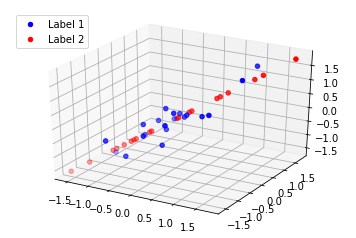

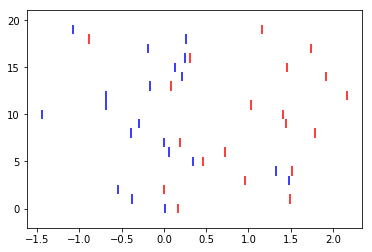

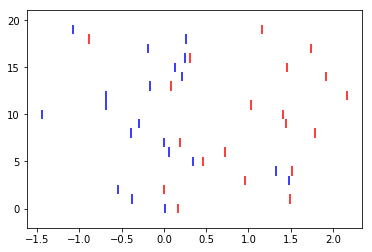

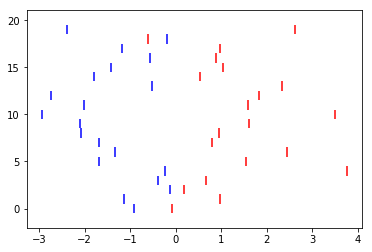

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Projects vector 'b' onto vector 'a'
def proj(b, a):
    return (np.dot(a, b) / np.linalg.norm(a) ** 2) * a

# Take samples for Label 1
mean1 = np.array([0,0,0])
cov1 = ((1,.9,.9), (.9,1,.9), (.9,.9,1))
s1 = multivariate_normal(mean1, cov1, 20)

# Take samples for Label 2
mean2 = np.array([0,0,1])
cov2 = ((1,.8,.8), (.8,1,.8), (.8,.8,1))
s2 = multivariate_normal(mean2, cov2, 20)

''' Part 1 '''
# Scatter both data sets on a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s1[:,0], s1[:,1], s1[:,2], c = 'b', label = 'Label 1')
ax.scatter(s2[:,0], s2[:,0], s2[:,0], c = 'r', label = 'Label 2')
ax.legend(loc='upper left')
plt.show()

''' Part 2 - Performing LDA by hand '''
# Consolidate the datasets and generate a corresponding label set
labels = []
data = []
for k in range(40):
    if k < 20:
        labels.append(1)
        data.append(s1[k])
    else:
        labels.append(2)
        data.append(s2[k - 20])
        
# Calculate between variance
btwnVar = np.dot((mean2 - mean1).reshape(3, 1), (mean2 - mean1).reshape(3, 1).transpose())

# Calculate within variances
within1 = np.dot((s1.reshape(3, 20) - mean1.reshape(3, 1)), (s1.reshape(3, 20) - mean1.reshape(3, 1)).transpose())
within2 = np.dot((s2.reshape(3, 20) - mean2.reshape(3, 1)), (s2.reshape(3, 20) - mean2.reshape(3, 1)).transpose())
withinVar = within1 + within2

# Calculate Fisher's Coefficient
fishers = np.linalg.inv(withinVar) * btwnVar

# Calculate the eigenpairs of Fisher's Coefficient
eig_vals, eig_vecs = np.linalg.eig(fishers)

# Make a list of (eigenvalue, eigenvector) tuples and sort them from high to low
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Choose w* to be the leading eigenvector
w_star = eig_pairs[0][1]
transformed_data = []
for point in data:
    transformed_data.append(proj(point.reshape(3, 1), w_star)[2])
transformed_data = np.matrix(transformed_data).reshape(40, 1)
s1_new = np.array(transformed_data[:20])
s2_new = np.array(transformed_data[20:])
plt.eventplot(s1_new, orientation='horizontal', colors='b')
plt.eventplot(s2_new, orientation='horizontal', colors='r')
plt.show()

# Choose w* to be m2 - m1
w_star = (mean2 - mean1)
transformed_data = []
for point in data:
    transformed_data.append(proj(point.reshape(3, 1), w_star)[2])
transformed_data = np.matrix(transformed_data).reshape(40, 1)
s1_new = np.array(transformed_data[:20])
s2_new = np.array(transformed_data[20:])
plt.eventplot(s1_new, orientation='horizontal', colors='b')
plt.eventplot(s2_new, orientation='horizontal', colors='r')
plt.show()

''' Part 3 - Perform LDA using sklearn '''
# Train and fit the model, then transform the data
clf = LDA()
LDA(solver='svd', shrinkage='auto', tol=0.05)
clf.fit(data, labels)
s1_new = clf.transform(s1)
s2_new = clf.transform(s2)

# Plot the results
plt.eventplot(s1_new, orientation='horizontal', colors='b')
plt.eventplot(s2_new, orientation='horizontal', colors='r')
plt.show()